In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from data import load_database_train, load_database_test
from sklearn.neighbors import KNeighborsClassifier
from preprocessing import InterpolateRawData
from test_model import test_model
from train import grid_search, scikit_train_validate
from cross_validation import cv_folds_author
import numpy as np
from plotter import plot_all_readings
from preprocessing import InterpolateRawData
from sklearn.neural_network import MLPClassifier
import pickle

%matplotlib inline

In [7]:
database_train = load_database_train()
X_processed = InterpolateRawData(num_samples=40).fit_transform(database_train.X)

database_test = load_database_test()
X_processed_test = InterpolateRawData(num_samples=40).fit_transform(database_test.X)

## KNN

train_scores:     ['0.90', '0.97', '0.91', '0.92', '0.91'] 
mean_train_score: 0.92
std_train_score:  0.02


test_scores:      ['0.91', '0.56', '0.50', '0.79', '0.87']
mean_test_score:  0.72
std_test_score:   0.17


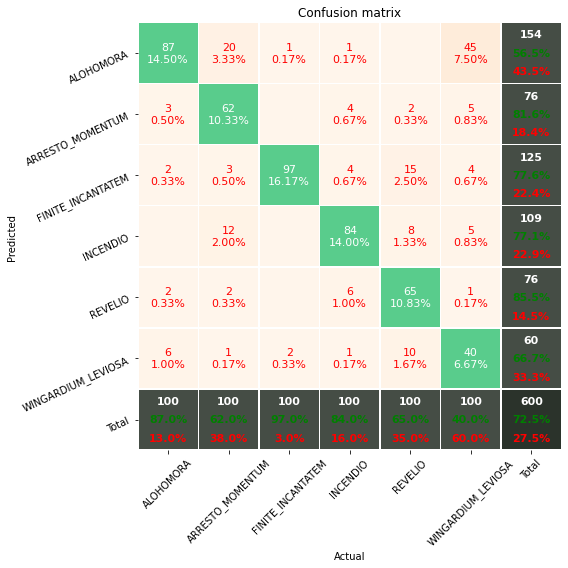

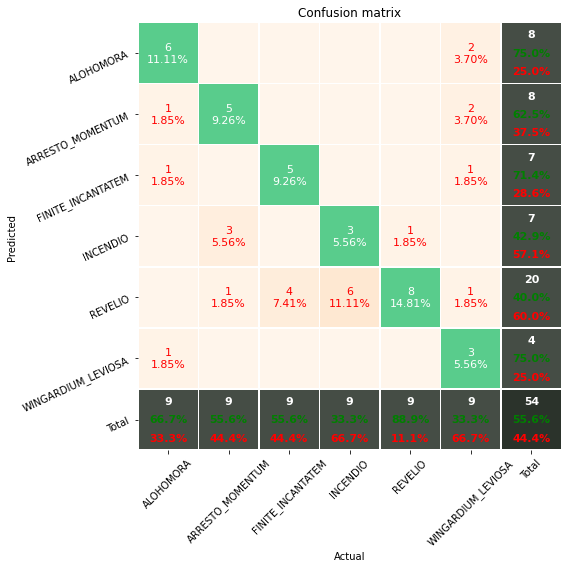

In [8]:
pipe = Pipeline([
    ('interpolate', InterpolateRawData(num_samples=40)),
    ('knn', KNeighborsClassifier(metric='manhattan', n_neighbors=15, p=3))
])

scikit_train_validate(pipe, database_train.X, database_train.y, database_train.cv_author)

pipe.fit(database_train.X, database_train.y)
 
with open('models/best_knn.pkl', 'wb') as file:
    pickle.dump(pipe, file)
    
test_model(pipe, False)

## Neural Network

train_scores:     ['1.00', '1.00', '1.00', '1.00', '1.00'] 
mean_train_score: 1.00
std_train_score:  0.00


test_scores:      ['0.97', '0.47', '0.92', '0.89', '0.93']
mean_test_score:  0.84
std_test_score:   0.18


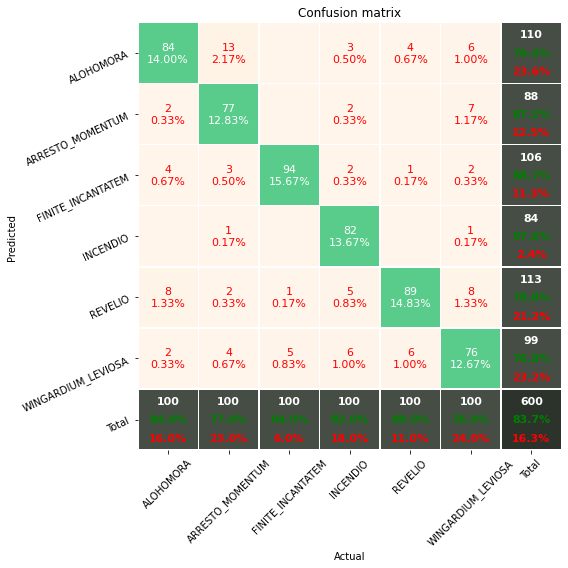

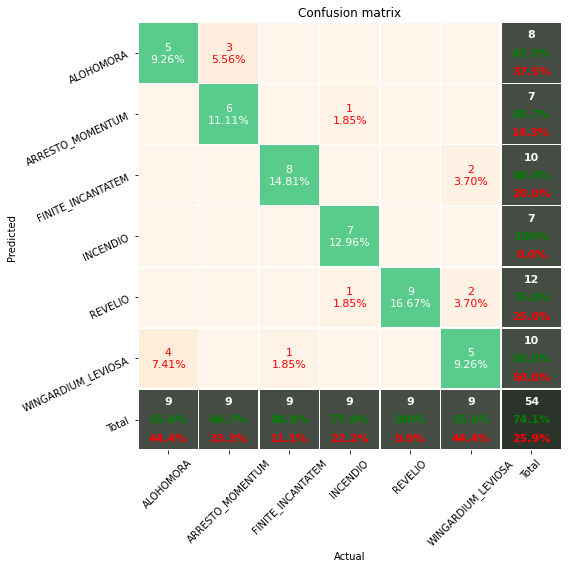

In [9]:
pipe = Pipeline([
    ('interpolate', InterpolateRawData(num_samples=40)),
    ('mlp', MLPClassifier(random_state=0, hidden_layer_sizes=(100, 10),
                          max_iter=100000, alpha=0.0001, learning_rate_init=0.0005))
])

scikit_train_validate(pipe, database_train.X, database_train.y, database_train.cv_author)

pipe.fit(database_train.X, database_train.y)
 
with open('models/best_fully_connected.pkl', 'wb') as file:
    pickle.dump(pipe, file)
    
test_model(pipe, False)

#### Extra: modelo só com acelerometro

In [10]:
pipe = Pipeline([
    ('interpolate',InterpolateRawData(features_name=["ACC"], num_samples=40)),
    ('mlp', MLPClassifier(random_state=0, hidden_layer_sizes=(50, 10),
                          max_iter=100000, alpha=0.0001, learning_rate_init=0.0005))
])

pipe.fit(database_train.X, database_train.y)
 
with open('models/best_fully_connected_acc.pkl', 'wb') as file:
    pickle.dump(pipe, file)

## Random forest

train_scores:     ['1.00', '1.00', '1.00', '1.00', '1.00'] 
mean_train_score: 1.00
std_train_score:  0.00


test_scores:      ['0.94', '0.42', '0.64', '0.92', '0.92']
mean_test_score:  0.77
std_test_score:   0.20


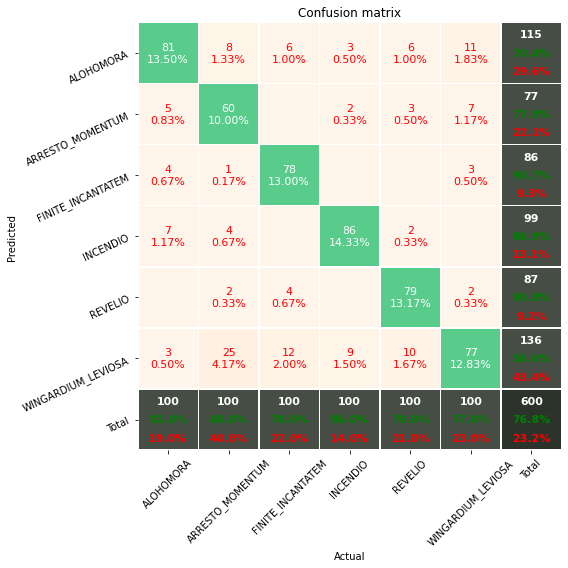

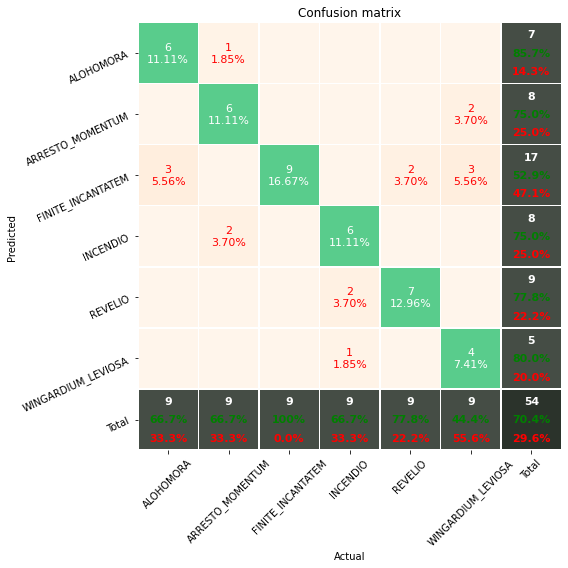

In [11]:
pipe = Pipeline([
    ('interpolate', InterpolateRawData(num_samples=40)),
    ('random', RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=0.6))
])

scikit_train_validate(pipe, database_train.X, database_train.y, database_train.cv_author)

pipe.fit(database_train.X, database_train.y)
 
with open('models/best_random_forest.pkl', 'wb') as file:
    pickle.dump(pipe, file)
    
test_model(pipe, False)